#**Abhi - Data Cleaning / Preprocessing & Exploration**

In [40]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:

file_path = '/content/drive/MyDrive/BTT AI Studio - AllState 1C/Code/claims_data.csv'

In [43]:
df = pd.read_csv(file_path)

In [44]:
# View data
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [45]:
# View data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [46]:
# View data description
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [47]:
# Drop id column
df.drop('id', axis=1, inplace=True)

In [48]:
# Find null values in dataset
df.isnull().any().any()

np.False_

In [49]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [50]:
# Check num of cat columns
cat_cols = df.select_dtypes(include='object').columns
print(len(cat_cols), "categorical columns found")

116 categorical columns found


In [51]:
# Checking if cat columns are consistent
for col in cat_cols:
    print(f"{col}: {df[col].unique()[:10]}")

cat1: ['A' 'B']
cat2: ['B' 'A']
cat3: ['A' 'B']
cat4: ['B' 'A']
cat5: ['A' 'B']
cat6: ['A' 'B']
cat7: ['A' 'B']
cat8: ['A' 'B']
cat9: ['B' 'A']
cat10: ['A' 'B']
cat11: ['B' 'A']
cat12: ['A' 'B']
cat13: ['A' 'B']
cat14: ['A' 'B']
cat15: ['A' 'B']
cat16: ['A' 'B']
cat17: ['A' 'B']
cat18: ['A' 'B']
cat19: ['A' 'B']
cat20: ['A' 'B']
cat21: ['A' 'B']
cat22: ['A' 'B']
cat23: ['B' 'A']
cat24: ['A' 'B']
cat25: ['A' 'B']
cat26: ['A' 'B']
cat27: ['A' 'B']
cat28: ['A' 'B']
cat29: ['A' 'B']
cat30: ['A' 'B']
cat31: ['A' 'B']
cat32: ['A' 'B']
cat33: ['A' 'B']
cat34: ['A' 'B']
cat35: ['A' 'B']
cat36: ['A' 'B']
cat37: ['A' 'B']
cat38: ['A' 'B']
cat39: ['A' 'B']
cat40: ['A' 'B']
cat41: ['A' 'B']
cat42: ['A' 'B']
cat43: ['A' 'B']
cat44: ['A' 'B']
cat45: ['A' 'B']
cat46: ['A' 'B']
cat47: ['A' 'B']
cat48: ['A' 'B']
cat49: ['A' 'B']
cat50: ['A' 'B']
cat51: ['A' 'B']
cat52: ['A' 'B']
cat53: ['A' 'B']
cat54: ['A' 'B']
cat55: ['A' 'B']
cat56: ['A' 'B']
cat57: ['A' 'B']
cat58: ['A' 'B']
cat59: ['A' 'B']
cat60:

In [52]:
# Count of unique values in each cat column
df[cat_cols].nunique().sort_values()


,0
cat1,2
cat2,2
cat3,2
cat4,2
cat5,2
...,...
cat112,51
cat113,61
cat109,84
cat110,131


In [53]:
# Checking num of num columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(len(num_cols), "numeric columns found")
print(num_cols)

15 numeric columns found
Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'],
      dtype='object')


In [54]:
# Checking num columns description
df[num_cols].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [55]:
# Checking correlation with loss
corr = df.corr(numeric_only=True)['loss'].sort_values(ascending=False)
print(corr)


loss      1.000000
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
cont6     0.040967
cont8     0.030508
cont10    0.020236
cont14    0.019298
cont9     0.014456
cont13   -0.004022
cont1    -0.010237
cont5    -0.011355
cont4    -0.035831
Name: loss, dtype: float64


<Axes: xlabel='loss', ylabel='Count'>

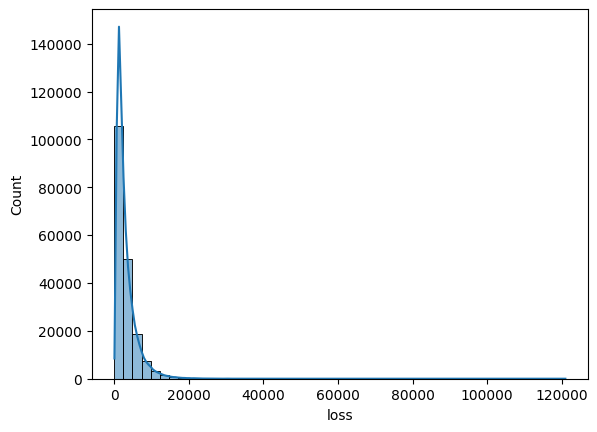

In [56]:
# Check correlation with loss
sns.histplot(df['loss'], bins=50, kde=True)

The histogram shows that the loss variable is highly right-skewed, meaning most observations have small losses while a few have extremely large ones, creating a long tail. This imbalance can negatively impact model performance, as large values dominate the learning process. To address this, I am applying a log transformation (np.log1p(df['loss'])) to compress the scale and make the distribution more symmetric, improving model stability and interpretability.

In [57]:
# Applying log transformation
df['log_loss'] = np.log1p(df['loss'])

<Axes: xlabel='log_loss', ylabel='Count'>

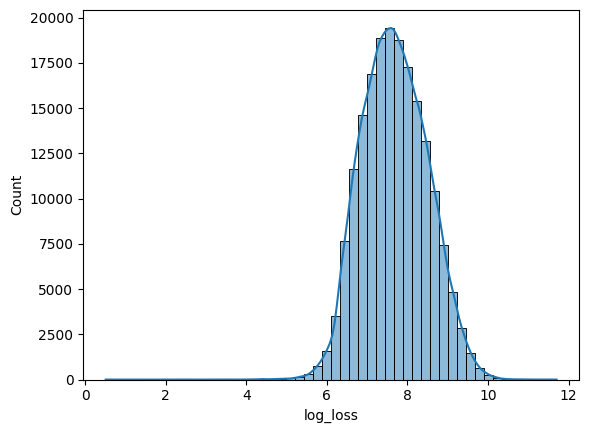

In [58]:
# Replot after log transformation
sns.histplot(df['log_loss'], bins=50, kde=True)

In [59]:
# Checking for loss and log_loss columns
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
0,A,B,A,B,A,A,A,A,B,A,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,8.008396
3,B,B,A,B,A,A,A,A,B,A,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,6.846784
4,A,B,A,B,A,A,A,A,B,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,7.924742


#**Sia - One-Hot Encoding**

In [60]:
cats_cols = [f'cat{i}' for i in range(1, 117)]
df_encoded = pd.get_dummies(df, columns=cats_cols, drop_first=False)
print(df_encoded.head())

      cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10  ...  cat116_P  cat116_Q  cat116_R  cat116_S  \
0  0.30260  0.67135  0.83510  ...     False     False     False     False   
1  0.60087  0.35127  0.43919  ...     False     False     False     False   
2  0.27320  0.26076  0.32446  ...     False     False     False     False   
3  0.31796  0.32128  0.44467  ...     False     False     False     False   
4  0.24564  0.22089  0.21230  ...     False     False     False     False   

   cat116_T  cat116_U  cat116_V  cat116_W  cat116_X  cat116_Y  
0     False     False 

Test Split

In [61]:
X = df_encoded.drop(['loss', 'log_loss'], axis = 1)
y = df_encoded['log_loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

#  Make predictions on the test data
prediction = model.predict(X_test)

y_pred = model.predict(X_test)

In [64]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.5607
R²: 0.5181


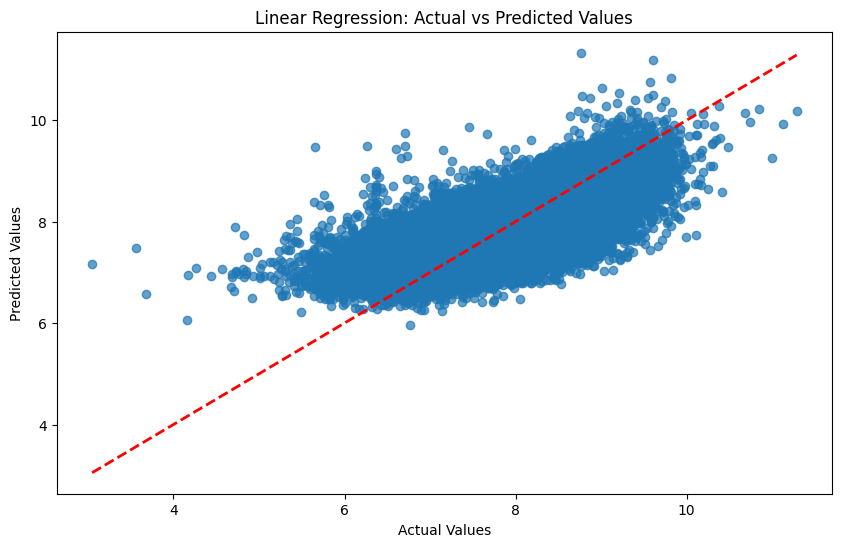

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")

# Draw a diagonal line (perfect prediction)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.show()

#**Livia - Correlation Analysis**

In [66]:
#only the original continuous numeric features
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_numeric = df[numeric_cols]

print(f"Number of continuous numeric features: {len(numeric_cols)}")
print("Numeric columns:", list(numeric_cols))

#correlation matrix
corr = df_numeric.corr()

Number of continuous numeric features: 16
Numeric columns: ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss', 'log_loss']


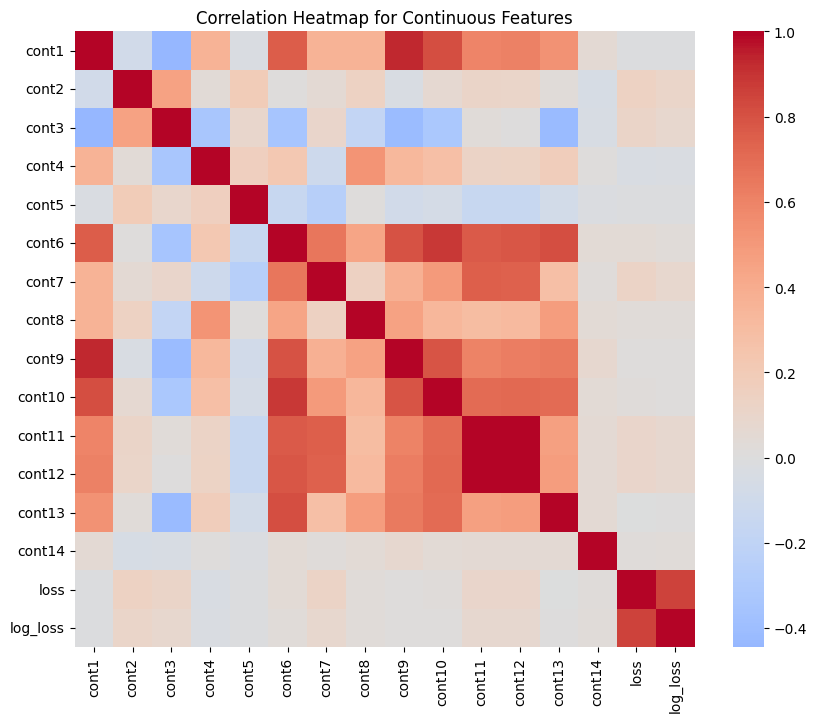

In [67]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap for Continuous Features')
plt.show()

In [68]:
#find highly correlated feature pairs
threshold = 0.8
high_corr = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

In [69]:
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_filtered = high_corr[high_corr['Correlation'].abs() > threshold]

print("highly correlated feature pairs (>|0.8|):")
display(high_corr_filtered)

highly correlated feature pairs (>|0.8|):


,Feature1,Feature2,Correlation
7,cont1,cont9,0.929912
8,cont1,cont10,0.808551
68,cont6,cont10,0.883351
71,cont6,cont13,0.815091
105,cont11,cont12,0.994384
119,loss,log_loss,0.857716


In [70]:
#summary of correlation stats
total_pairs = len(numeric_cols) * (len(numeric_cols) - 1) / 2
num_high_pairs = high_corr_filtered.shape[0]
percent = (num_high_pairs / total_pairs) * 100

print(f"\nTotal numeric features analyzed: {len(numeric_cols)}")
print(f"Highly correlated pairs (>0.8): {num_high_pairs} ({percent:.2f}% of all pairs)")
print("\nCorrelation analysis complete.")


Total numeric features analyzed: 16
Highly correlated pairs (>0.8): 6 (5.00% of all pairs)

Correlation analysis complete.


#**Abhi - Neural Nets**

# Task
Scale the numerical features in `X_train` and `X_test` using `StandardScaler`, then build a neural network model using Keras. The model should be a sequential model with Dense layers, appropriate activation functions, and an output layer suitable for regression. Compile the model with an optimizer like Adam and `mean_squared_error` as the loss function. Train the compiled model on the scaled training data (`X_train`, `y_train`). Finally, evaluate the model by making predictions on the scaled test data (`X_test`), converting these predictions from log scale back to the original scale using `np.expm1()`, and calculating Mean Squared Error (MSE) and Mean Absolute Error (MAE) for both the log-transformed loss and the original loss values to assess its performance.

In [71]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the fitted scaler
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled and X_test_scaled have been created.")

X_train_scaled and X_test_scaled have been created.


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add the first Dense layer with input_dim matching the number of features in X_train_scaled
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add additional Dense layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add the output layer for regression (1 unit, no activation)
model.add(Dense(units=1))

print("Neural network model defined successfully.")

Neural network model defined successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer='adam', loss='mean_squared_error')

print("Neural network model compiled with Adam optimizer and Mean Squared Error loss.")

Neural network model compiled with Adam optimizer and Mean Squared Error loss.


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add the first Dense layer with input_dim matching the number of features in X_train_scaled
# Assuming X_train_scaled is available from previous steps.
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add additional Dense layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add the output layer for regression (1 unit, no activation)
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Neural network model compiled with Adam optimizer and Mean Squared Error loss.")

Neural network model compiled with Adam optimizer and Mean Squared Error loss.


In [75]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

print("Neural network model trained for 10 epochs successfully.")

Neural network model trained for 10 epochs successfully.


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the scaled test data
log_loss_predictions = model.predict(X_test_scaled)

# Clip log_loss_predictions to prevent overflow when converting back to original scale
# The maximum observed log_loss in the dataset is around 9.78 (from y_train.max()).
# Clipping at 12.0 allows for some extrapolation while preventing numerical instability.
log_loss_predictions = np.clip(log_loss_predictions, a_min=None, a_max=12.0)

# Convert log_loss_predictions to original scale
original_loss_predictions = np.expm1(log_loss_predictions)

# Convert y_test (log_loss) to original scale for comparison
y_test_original_scale = np.expm1(y_test)

# Calculate MSE and MAE for log-transformed loss
mse_log_loss = mean_squared_error(y_test, log_loss_predictions)
mae_log_loss = mean_absolute_error(y_test, log_loss_predictions)

# Calculate MSE and MAE for original loss
mse_original_loss = mean_squared_error(y_test_original_scale, original_loss_predictions)
mae_original_loss = mean_absolute_error(y_test_original_scale, original_loss_predictions)

print(f"\nMetrics for Log-Transformed Loss:")
print(f"  Mean Squared Error (MSE): {mse_log_loss:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_log_loss:.4f}")

print(f"\nMetrics for Original Loss Scale:")
print(f"  Mean Squared Error (MSE): {mse_original_loss:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_original_loss:.4f}")

1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Metrics for Log-Transformed Loss:
  Mean Squared Error (MSE): 0.3196
  Mean Absolute Error (MAE): 0.4375

Metrics for Original Loss Scale:
  Mean Squared Error (MSE): 5438941.4592
  Mean Absolute Error (MAE): 1230.6302


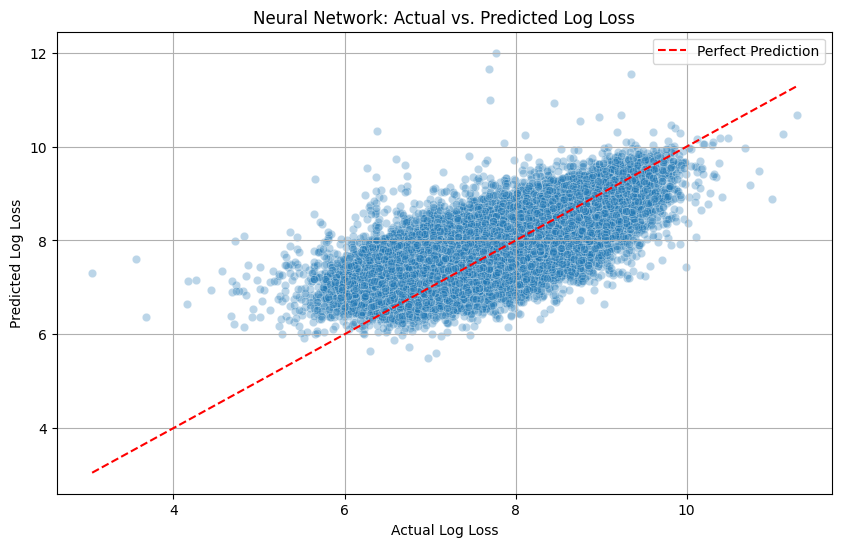

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Log-Transformed Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=log_loss_predictions.flatten(), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Log Loss')
plt.ylabel('Predicted Log Loss')
plt.title('Neural Network: Actual vs. Predicted Log Loss')
plt.legend()
plt.grid(True)
plt.show()

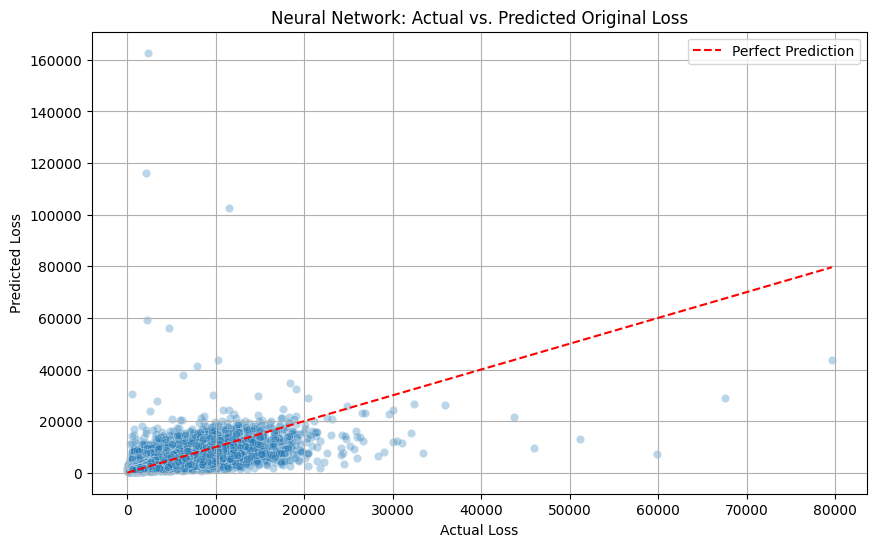

In [78]:
# Plot for Original Loss Scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale, y=original_loss_predictions.flatten(), alpha=0.3)
plt.plot([y_test_original_scale.min(), y_test_original_scale.max()], [y_test_original_scale.min(), y_test_original_scale.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')
plt.title('Neural Network: Actual vs. Predicted Original Loss')
plt.legend()
plt.grid(True)
plt.show()

Livia - Decision Tree Regression Model


Decision Tree Model trained successfully

Model Performance:
RMSE: 0.63
R² Score: 0.395

Top 10 Important Features:
cat80_D    0.582967
cat12_B    0.116385
cat79_D    0.059459
cat81_D    0.055375
cont2      0.031021
cat1_B     0.029763
cat44_B    0.019631
cat57_B    0.017723
cat53_A    0.015943
cont7      0.013097
dtype: float64


/tmp/ipython-input-3027598700.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


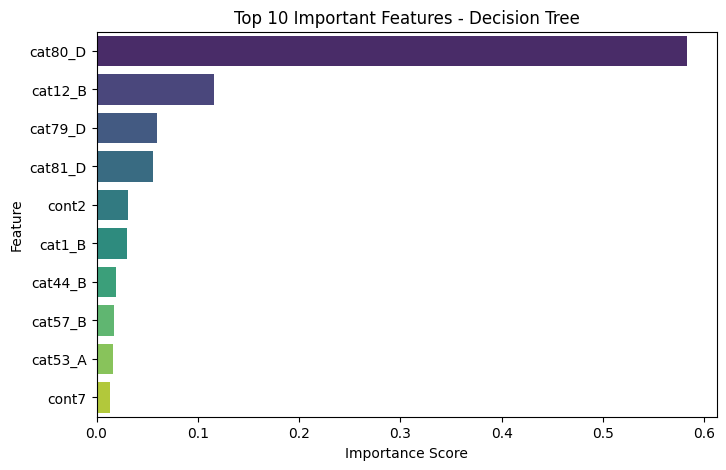

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# defining features and target
X = df_encoded.drop(['loss', 'log_loss'], axis=1, errors='ignore')
y = df_encoded['log_loss'] if 'log_loss' in df_encoded.columns else df_encoded['loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initializing and train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)

#for debugging
print("Decision Tree Model trained successfully")

#performance
y_pred = dt_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

print("\nTop 10 Important Features:")
print(top_features)

#feature importances plotted
plt.figure(figsize=(8,5))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Model Performance:
RMSE: 0.63
R² Score: 0.395

Top 10 Important Features:
cat80_D    0.582967
cat12_B    0.116385
cat79_D    0.059459
cat81_D    0.055375
cont2      0.031021
cat1_B     0.029763
cat44_B    0.019631
cat57_B    0.017723
cat53_A    0.015943
cont7      0.013097
dtype: float64


/tmp/ipython-input-3344904937.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


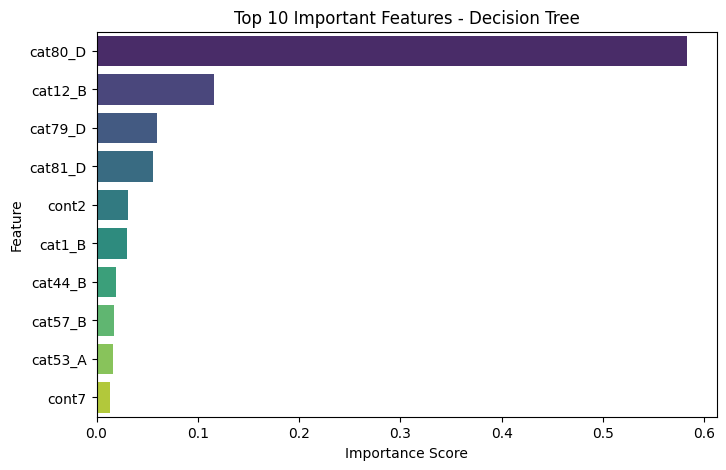

In [89]:
#defining features and target
X = df_encoded.drop(['loss', 'log_loss'], axis=1, errors='ignore')
y = df_encoded['log_loss'] if 'log_loss' in df_encoded.columns else df_encoded['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# initializing and train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)
#for debugging print("Decision Tree Model trained successfully")
#performance
y_pred = dt_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
print("\nTop 10 Important Features:")
print(top_features)
#feature importances plotted
plt.figure(figsize=(8,5))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Rashha - Gradient Boosting

In [80]:
# Rashha - LightGBM Regressor
# imports
import lightgbm as lgb

In [81]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

In [82]:
# LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
}

In [83]:
callbacks = [lgb.log_evaluation(period=50)]

In [84]:
lgb_model = lgb.train(
    params=params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_test],
    num_boost_round=500,
    callbacks=callbacks
)

[50]	training's rmse: 0.577887	valid_1's rmse: 0.574931
[100]	training's rmse: 0.549225	valid_1's rmse: 0.547876
[150]	training's rmse: 0.539365	valid_1's rmse: 0.539864
[200]	training's rmse: 0.534125	valid_1's rmse: 0.536429
[250]	training's rmse: 0.530615	valid_1's rmse: 0.534856
[300]	training's rmse: 0.528001	valid_1's rmse: 0.534248
[350]	training's rmse: 0.525732	valid_1's rmse: 0.53389
[400]	training's rmse: 0.523588	valid_1's rmse: 0.533636
[450]	training's rmse: 0.521523	valid_1's rmse: 0.533364
[500]	training's rmse: 0.519405	valid_1's rmse: 0.533217


In [85]:
# Evaluate performance
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"\nLightGBM Model Performance (evaluated on test set):")
print(f"RMSE: {rmse_lgb:.3f}")
print(f"R² Score: {r2_lgb:.3f}")


LightGBM Model Performance (evaluated on test set):
RMSE: 0.533
R² Score: 0.564


/tmp/ipython-input-2773421238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


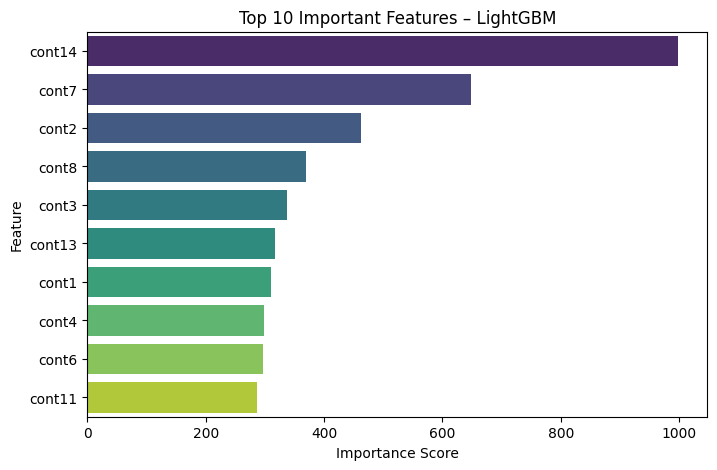

In [86]:
# Feature importance plot
importance = pd.Series(lgb_model.feature_importance(), index=X.columns)
top_features = importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features – LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Compared to the baseline Decision Tree model, the LightGBM implementation demonstrates a clear and substantial performance improvement. The Decision Tree achieved an RMSE of 0.63 and an R² of 0.395, indicating that while it captured some nonlinear relationships in the data, its predictive power was limited and prone to underfitting. In contrast, the gradient boosting approach reduced the RMSE to 0.53 and raised the R² to 0.564, reflecting a significantly tighter fit and stronger explanatory capacity.

In [87]:
# Predictions on log scale (already done)
y_pred_log = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Convert both predictions and true labels back to original loss scale
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Metrics on log-transformed loss
mse_log = mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)

# Metrics on original loss scale
mse_orig = mean_squared_error(y_test_original, y_pred_original)
mae_orig = mean_absolute_error(y_test_original, y_pred_original)

print(f"Log scale: MSE {mse_log:.3f}, MAE {mae_log:.3f}")
print(f"Original scale: MSE {mse_orig/1e6:.2f}M, MAE ≈ ${mae_orig:,.0f}")

Log scale: MSE 0.284, MAE 0.414
Original scale: MSE 3.62M, MAE ≈ $1,137


Olivier's XGBoost Model

In [88]:
#Features
# Drop target variables and id column to create feature matrix
X = df_encoded.drop(['log_loss', 'loss', 'id'], axis=1)
y = df['log_loss']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

KeyError: "['id'] not found in axis"

In [ ]:
#XGBoost Model
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Initialize XGBoost model with basic parameters
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster training for large datasets
)

print("Model initialized successfully!")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print("Training XGBoost model...")

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100  # Print progress every 100 iterations
)

print("\nTraining completed!")


# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


# Evaluate model performance using MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"\nTraining Set MAE:  {train_mae:.4f}")
print(f"Test Set MAE:      {test_mae:.4f}")



# Convert predictions back to original scale (reverse log transformation)
y_train_pred_original = np.expm1(y_train_pred)
y_test_pred_original = np.expm1(y_test_pred)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Evaluate MAE on original scale
train_mae_original = mean_absolute_error(y_train_original, y_train_pred_original)
test_mae_original = mean_absolute_error(y_test_original, y_test_pred_original)
print(f"\nTraining Set MAE:  ${train_mae_original:,.2f}")
print(f"Test Set MAE:      ${test_mae_original:,.2f}")





Rajab - Random Forest Model